In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import math

from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

In [2]:
pop = pd.read_csv('GDP and population/china_population.txt')
GDP = pd.read_csv('GDP and population/china_gdp.csv')

In [3]:
pop = pop[['Year','Value']]
pop=pop.rename(columns={'Value':'Population'})

In [4]:
GDP=GDP.rename(columns={'Value':'GDP'})

In [5]:
pop_gdp = pd.merge(GDP,pop)

In [6]:
pop_gdp.head()

,Year,GDP,Population
0,1960,5.918412e+10,667070000
1,1961,4.955705e+10,660330000
2,1962,4.668518e+10,665770000
3,1963,5.009730e+10,682335000
4,1964,5.906225e+10,698355000


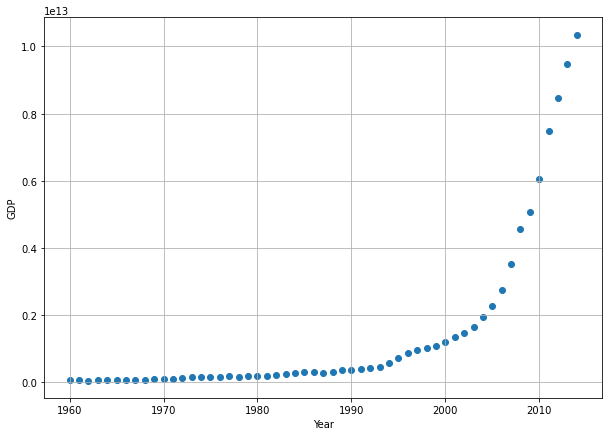

In [7]:
plt.figure(figsize=(10,7))
plt.scatter(pop_gdp.Year,pop_gdp.GDP)
plt.grid()
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()

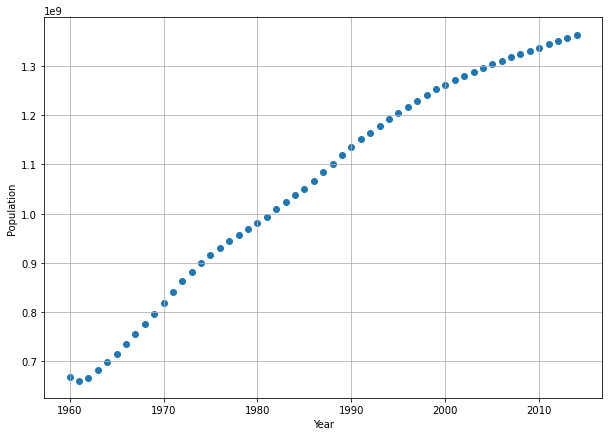

In [8]:
plt.figure(figsize=(10,7))
plt.scatter(pop_gdp.Year ,pop_gdp.Population)
plt.grid()
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()

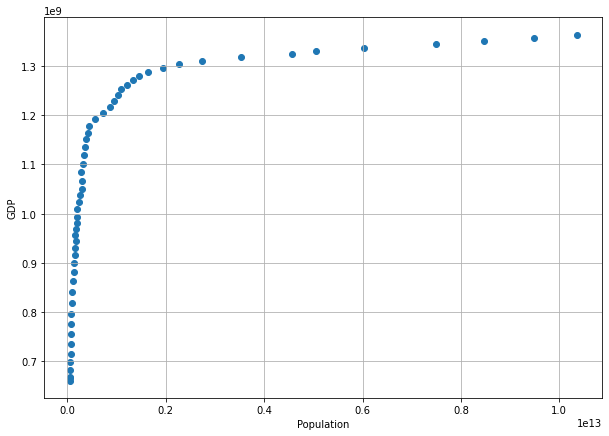

In [9]:
plt.figure(figsize=(10,7))
plt.scatter(pop_gdp.GDP,pop_gdp.Population )
plt.grid()
plt.ylabel('GDP')
plt.xlabel('Population')
plt.show()

In [10]:
pop_gdp.corr()

,Year,GDP,Population
Year,1.000000,0.723858,0.990633
GDP,0.723858,1.000000,0.634859
Population,0.990633,0.634859,1.000000


#### Separating train data and test data

In [16]:
msk = np.random.rand(len(pop_gdp)) < 0.8
train = pop_gdp[msk]
test = pop_gdp[~msk]

In [17]:
Pop_y = np.asanyarray(train[['Population']])
GDP_X = np.asanyarray(train[['GDP']])

#### Train Data Normalization 

In [18]:
y_n =[]
for i in Pop_y :
    temp = ((i -  np.average(Pop_y))/(Pop_y.max() - Pop_y.min() ) )
    y_n = np.append(y_n,temp)

In [19]:
X_n =[]
for i in GDP_X :
    temp = ((i -  np.average(GDP_X))/(GDP_X.max() - GDP_X.min() ) )
    X_n = np.append(X_n,temp)

In [20]:
regr = linear_model.LinearRegression()
regr.fit(X_n.reshape(45,-1),y_n.reshape(45,-1)) # we have a problem here , 45 has been changeing , 45should be dynamic

print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.86251412]]
Intercept:  [-7.36756683e-17]


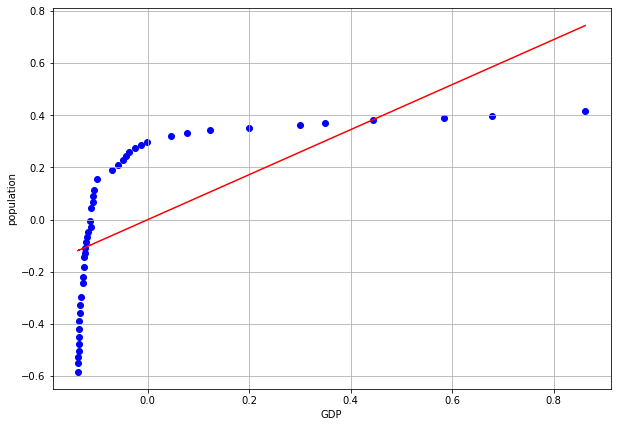

In [21]:
plt.figure(figsize=(10, 7))
plt.scatter(X_n, y_n,  color='blue')
plt.plot(X_n, regr.coef_[0][0]*X_n + regr.intercept_[0], '-r')
plt.xlabel("GDP")
plt.ylabel("population")
plt.grid()
plt.show()

In [22]:
Pop_y_t = np.asanyarray(test[['Population']])
GDP_X_t = np.asanyarray(test[['GDP']])

#### Test Data Normalization 

In [23]:
y_n_t =[]
for i in Pop_y_t :
    temp = ((i -  np.average(Pop_y_t))/(Pop_y_t.max() - Pop_y_t.min() ) )
    y_n_t = np.append(y_n_t,temp)

In [24]:
X_n_t =[]
for i in GDP_X_t :
    temp = ((i -  np.average(GDP_X_t))/(GDP_X_t.max() - GDP_X_t.min() ) )
    X_n_t = np.append(X_n_t,temp)

In [25]:
test_y_ = regr.predict(X_n_t.reshape(10,-1)) # we have a problem here , 10 has been changeing 

print("R2-score: %.2f" % r2_score(y_n_t , test_y_) )

R2-score: 0.32


#### trying another way to generate a model

In [26]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_n.reshape(45,-1)) # we have a problem here , 45 has been changeing 

In [28]:
regrp = linear_model.LinearRegression()
y_train_ = regrp.fit(X_poly, y_n.reshape(45,-1)) # we have a problem here , 45 has been changeing 

print ('Coefficients: ', regrp.coef_)
print ('Intercept: ',regrp.intercept_)

Coefficients:  [[ 0.          2.08651234 -2.37258905]]
Intercept:  [0.12937382]


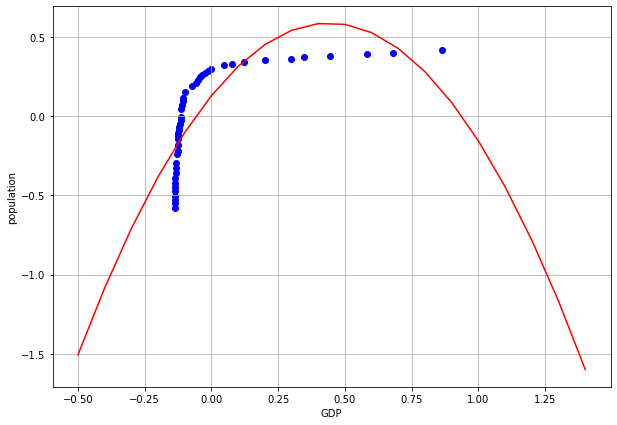

In [29]:
plt.figure(figsize=(10, 7))
plt.scatter(X_n, y_n,  color='blue')
XX = np.arange(-0.5 , 1.5 , 0.1)
yy = regrp.intercept_[0]+ regrp.coef_[0][1]*XX+ regrp.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.grid()
plt.xlabel("GDP")
plt.ylabel("population")
plt.show()

In [30]:
X_poly_test = poly.fit_transform(X_n_t.reshape(10,-1)) # we have a problem here , 10 has been changeing 
test_y_p = regrp.predict(X_poly_test)

In [31]:
print("R2-score: %.2f" % r2_score(y_n_t,test_y_p ) )

R2-score: 0.46


##### model is not fit so we try sigmoid function.

In [39]:
def sigmoid(x, a , b , c):
    y =(-(a*np.exp(-(b)*x)) + c)
    return y

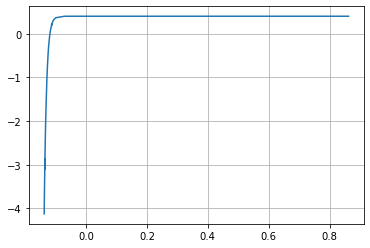

In [40]:
a =0.0000001
b =128
c =0.4 
# i guessed this value with this  https://www.desmos.com/calculator/auubsajefh

Y_pred = sigmoid( X_n , a , b , c)

plt.plot(X_n, Y_pred)
plt.grid()

In [41]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, X_n,y_n)
#print the final parameters
print(" a = %f, b = %f c = %f"% (popt[0], popt[1] , popt[2]))

 a = 0.002573, b = 42.098754 c = 0.325532


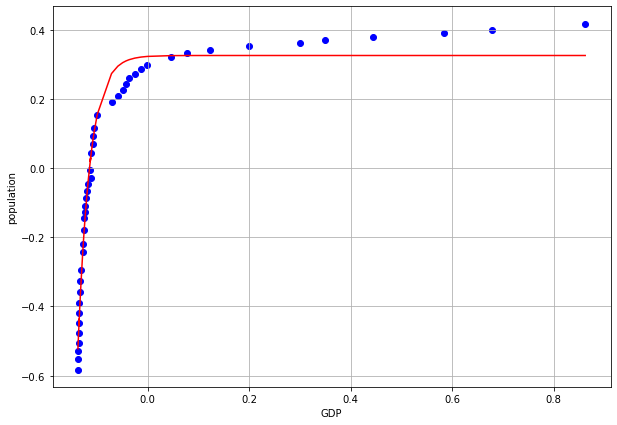

In [42]:
plt.figure(figsize=(10, 7))
plt.scatter(X_n, y_n,  color='blue')
plt.plot(X_n , sigmoid(X_n ,popt[0],popt[1] ,popt[2]) , color='red')
plt.grid()
plt.xlabel("GDP")
plt.ylabel("population")
plt.show()

In [45]:
test_y_s = sigmoid(X_n_t ,popt[0],popt[1] ,popt[2])
print("R2-score: %.2f" % r2_score(y_n_t,test_y_s ) )

R2-score: 0.90
